In [1]:
# Import Dependencies
import pandas as pd
import json
import glob
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
# DATA PREPARATION - New JSON

%cd /content/drive/MyDrive/ColabNotebooks/MSDO_Predictor

# DATA PREPARATION - New JSON
new_df_combined = pd.read_json('ALLsemesters.json')
new_df_combined.drop('toeflScore', axis=1, inplace=True)

# Extract institution, degree, and GPA from 'education' field
new_df_combined['institution'] = new_df_combined['education'].apply(lambda x: x['institution'] if isinstance(x, dict) and 'institution' in x else None)
new_df_combined['degree'] = new_df_combined['education'].apply(lambda x: x['degree'] if isinstance(x, dict) and 'degree' in x else None)
new_df_combined['gpa'] = new_df_combined['education'].apply(lambda x: x['gpa'] if isinstance(x, dict) and 'gpa' in x else None)

new_df_combined['gre_quantitative'] = new_df_combined['gre'].apply(lambda x: x['quantitative'] if isinstance(x, dict) and 'quantitative' in x else None)
new_df_combined['gre_verbal'] = new_df_combined['gre'].apply(lambda x: x['verbal'] if isinstance(x, dict) and 'verbal' in x else None)
new_df_combined['gre_writing'] = new_df_combined['gre'].apply(lambda x: x['writing'] if isinstance(x, dict) and 'writing' in x else None)


# Drop the several columns
new_df_combined = new_df_combined.drop('education', axis=1)
new_df_combined = new_df_combined.drop('applicationDate', axis=1)
new_df_combined = new_df_combined.drop('decisionDate', axis=1)
new_df_combined = new_df_combined.drop('gre', axis=1)

new_df_combined

/content/drive/MyDrive/ColabNotebooks/MSDO_Predictor


,status,recommendations,experience,statementOfPurpose,comments,moocs,relevantCreditCourses,institution,degree,gpa,gre_quantitative,gre_verbal,gre_writing
0,Accepted,0,"Unrelated(Active Duty Air Force), open source ...",Y,"All A's for prereq's, including the ones on th...",NaN,NaN,Big State School,MS in Software Engineering,4.00,NaN,NaN,NaN
1,Accepted,1,"3 years as machine learning engineer, 3 years ...",Y,I also have publications and thesis. Generally...,NaN,NaN,University of Minnesota,MS in Computer Science,3.70,NaN,NaN,NaN
2,Rejected,1,"3 years, manufacturing, Python & SQL",Y,"Got rejected, but I've already accepted an adm...",NaN,NaN,University of Illinois,BS in Mechanical Engineering,3.75,NaN,NaN,NaN
3,Accepted,3,5 years in research in academia which involved...,Y,Nervous and will need to do a lot of studying ...,NaN,NaN,None,BS in Health Sciences,NaN,NaN,NaN,NaN
4,Accepted,3,NaN,Y,My Weakness - I know my 3.92 GPA seems like a ...,NaN,NaN,UT Austin,BS in Data Science,3.92,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,2,Manufacturing Operations and Quality 8 yrs,Talked about experience working on Stats and r...,NaN,Coursera ML Mathematics and Python,NaN,None,BS in Mechanical Engineering,3.50,NaN,NaN,NaN
68,Accepted,3,"Community college professor (tenured, 8 years)...",Explained the big project I wanted to work on ...,NaN,none,NaN,UCSD,MS in Materials Science,3.80,NaN,NaN,NaN
69,Accepted,0,"Not much, but I just accepted a position as an...",Explained how I am passionate about building a...,NaN,1 - Deep Learning with PyTorch from IBM,NaN,UT Austin,MA in Economics,3.60,160.0,168.0,4.5
70,Accepted,2,"15 Years, Cloud, DevOps, Python, ML",Explained how my previous experience is relate...,NaN,Andrew NG's ML Specialization,NaN,None,BS in Mechanical Engineering,3.40,NaN,NaN,NaN


In [3]:
import re

def calculate_total_experience(text):
    if isinstance(text, str):
        total_years = 0
        pattern_years = r"(\d+)\s*(year|yr|years)"
        pattern_months = r"(\d+)\s*(month|months)"

        # Find mentions of years
        matches_years = re.findall(pattern_years, text)
        for match in matches_years:
            years = int(match[0])
            total_years += years

        # Find mentions of months and convert to years
        matches_months = re.findall(pattern_months, text)
        for match in matches_months:
            months = int(match[0])
            years = months / 12
            total_years += years

        return total_years

    return 0

# Apply the calculate_total_experience function to the 'experience' column
new_df_combined['total_experience'] = new_df_combined['experience'].apply(calculate_total_experience)
new_df_combined = new_df_combined.drop('experience', axis=1)

new_df_combined

,status,recommendations,statementOfPurpose,comments,moocs,relevantCreditCourses,institution,degree,gpa,gre_quantitative,gre_verbal,gre_writing,total_experience
0,Accepted,0,Y,"All A's for prereq's, including the ones on th...",NaN,NaN,Big State School,MS in Software Engineering,4.00,NaN,NaN,NaN,0.0
1,Accepted,1,Y,I also have publications and thesis. Generally...,NaN,NaN,University of Minnesota,MS in Computer Science,3.70,NaN,NaN,NaN,6.0
2,Rejected,1,Y,"Got rejected, but I've already accepted an adm...",NaN,NaN,University of Illinois,BS in Mechanical Engineering,3.75,NaN,NaN,NaN,3.0
3,Accepted,3,Y,Nervous and will need to do a lot of studying ...,NaN,NaN,None,BS in Health Sciences,NaN,NaN,NaN,NaN,5.0
4,Accepted,3,Y,My Weakness - I know my 3.92 GPA seems like a ...,NaN,NaN,UT Austin,BS in Data Science,3.92,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,2,Talked about experience working on Stats and r...,NaN,Coursera ML Mathematics and Python,NaN,None,BS in Mechanical Engineering,3.50,NaN,NaN,NaN,8.0
68,Accepted,3,Explained the big project I wanted to work on ...,NaN,none,NaN,UCSD,MS in Materials Science,3.80,NaN,NaN,NaN,8.0
69,Accepted,0,Explained how I am passionate about building a...,NaN,1 - Deep Learning with PyTorch from IBM,NaN,UT Austin,MA in Economics,3.60,160.0,168.0,4.5,0.0
70,Accepted,2,Explained how my previous experience is relate...,NaN,Andrew NG's ML Specialization,NaN,None,BS in Mechanical Engineering,3.40,NaN,NaN,NaN,0.0


In [4]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
# Define preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Removing special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]

    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to lowercase the text
def lowercase_text(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return str(text).lower()

# Function to remove special characters
def remove_special_characters(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english'))
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [word for word in tokens if word not in stop_words]
        filtered_text = ' '.join(filtered_tokens)
        return filtered_text
    else:
        return text

# Function to lemmatize the text
def lemmatize_text(text):
    if isinstance(text, str):
        lemmatizer = WordNetLemmatizer()
        tokens = nltk.word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
        lemmatized_text = ' '.join(lemmatized_tokens)
        return lemmatized_text
    else:
        return text

# Define a list of columns with text data
text_columns = ['comments', 'statementOfPurpose', 'moocs', 'relevantCreditCourses', 'institution', 'degree']

# Apply preprocessing steps to text columns
for column in text_columns:
    new_df_combined[column] = new_df_combined[column].apply(lowercase_text)
    new_df_combined[column] = new_df_combined[column].apply(remove_special_characters)
    new_df_combined[column] = new_df_combined[column].apply(remove_stopwords)
    new_df_combined[column] = new_df_combined[column].apply(lemmatize_text)

In [7]:
new_df_combined

,status,recommendations,statementOfPurpose,comments,moocs,relevantCreditCourses,institution,degree,gpa,gre_quantitative,gre_verbal,gre_writing,total_experience
0,Accepted,0,,prereqs including one math prep form,nan,nan,big state school,m software engineering,4.00,NaN,NaN,NaN,0.0
1,Accepted,1,,also publication thesis generally think deserv...,nan,nan,university minnesota,m computer science,3.70,NaN,NaN,NaN,6.0
2,Rejected,1,,got rejected ive already accepted admission of...,nan,nan,university illinois,b mechanical engineering,3.75,NaN,NaN,NaN,3.0
3,Accepted,3,,nervous need lot studying mathsprogramming fall,nan,nan,none,b health science,NaN,NaN,NaN,NaN,5.0
4,Accepted,3,,weakness know gpa seems like good one however ...,nan,nan,ut austin,b data science,3.92,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,2,talked experience working stats related projec...,nan,coursera ml mathematics python,nan,none,b mechanical engineering,3.50,NaN,NaN,NaN,8.0
68,Accepted,3,explained big project wanted work relates care...,nan,none,nan,ucsd,m material science,3.80,NaN,NaN,NaN,8.0
69,Accepted,0,explained passionate building career data long...,nan,deep learning pytorch ibm,nan,ut austin,economics,3.60,160.0,168.0,4.5,0.0
70,Accepted,2,explained previous experience related data sci...,nan,andrew ng ml specialization,nan,none,b mechanical engineering,3.40,NaN,NaN,NaN,0.0


In [8]:
new_df_combined['comments_processed'] = new_df_combined['comments'].apply(preprocess_text)
new_df_combined['statementOfPurpose_processed'] = new_df_combined['statementOfPurpose'].apply(preprocess_text)
new_df_combined['moocs_processed'] = new_df_combined['moocs'].apply(preprocess_text)
new_df_combined['relevantCreditCourses_processed'] = new_df_combined['relevantCreditCourses'].apply(preprocess_text)
new_df_combined['institution_processed'] = new_df_combined['institution'].apply(preprocess_text)
new_df_combined['degree_processed'] = new_df_combined['degree'].apply(preprocess_text)

new_df_combined

,status,recommendations,statementOfPurpose,comments,moocs,relevantCreditCourses,institution,degree,gpa,gre_quantitative,gre_verbal,gre_writing,total_experience,comments_processed,statementOfPurpose_processed,moocs_processed,relevantCreditCourses_processed,institution_processed,degree_processed
0,Accepted,0,,prereqs including one math prep form,nan,nan,big state school,m software engineering,4.00,NaN,NaN,NaN,0.0,prereqs including one math prep form,,nan,nan,big state school,software engineering
1,Accepted,1,,also publication thesis generally think deserv...,nan,nan,university minnesota,m computer science,3.70,NaN,NaN,NaN,6.0,also publication thesis generally think deserv...,,nan,nan,university minnesota,computer science
2,Rejected,1,,got rejected ive already accepted admission of...,nan,nan,university illinois,b mechanical engineering,3.75,NaN,NaN,NaN,3.0,got rejected ive already accepted admission of...,,nan,nan,university illinois,b mechanical engineering
3,Accepted,3,,nervous need lot studying mathsprogramming fall,nan,nan,none,b health science,NaN,NaN,NaN,NaN,5.0,nervous need lot studying mathsprogramming fall,,nan,nan,none,b health science
4,Accepted,3,,weakness know gpa seems like good one however ...,nan,nan,ut austin,b data science,3.92,NaN,NaN,NaN,0.0,weakness know gpa seems like good one however ...,,nan,nan,ut austin,b data science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,2,talked experience working stats related projec...,nan,coursera ml mathematics python,nan,none,b mechanical engineering,3.50,NaN,NaN,NaN,8.0,nan,talked experience working stats related projec...,coursera ml mathematics python,nan,none,b mechanical engineering
68,Accepted,3,explained big project wanted work relates care...,nan,none,nan,ucsd,m material science,3.80,NaN,NaN,NaN,8.0,nan,explained big project wanted work relates care...,none,nan,ucsd,material science
69,Accepted,0,explained passionate building career data long...,nan,deep learning pytorch ibm,nan,ut austin,economics,3.60,160.0,168.0,4.5,0.0,nan,explained passionate building career data long...,deep learning pytorch ibm,nan,ut austin,economics
70,Accepted,2,explained previous experience related data sci...,nan,andrew ng ml specialization,nan,none,b mechanical engineering,3.40,NaN,NaN,NaN,0.0,nan,explained previous experience related data sci...,andrew ng ml specialization,nan,none,b mechanical engineering


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the list of text columns
text_columns = ['comments_processed', 'statementOfPurpose_processed', 'moocs_processed', 'relevantCreditCourses_processed', 'institution_processed', 'degree_processed']

# Combine the text columns into a single column
new_df_combined['combined_text'] = new_df_combined[text_columns].apply(lambda x: ' '.join(x), axis=1)

# Convert the combined text data to a list
text_data = new_df_combined['combined_text'].values.astype('U').tolist()

# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data using the vectorizer
text_vectors = vectorizer.fit_transform(text_data)

# Convert the resulting sparse matrix to a dense array
text_vectors = text_vectors.toarray()


In [10]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 5

# Create an instance of the KMeans algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the text vectors
kmeans.fit(text_vectors)

# Get the cluster labels for each text vector
cluster_labels = kmeans.labels_

# Assign the cluster labels to the dataframe
new_df_combined['cluster_label'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
new_df_combined

,status,recommendations,statementOfPurpose,comments,moocs,relevantCreditCourses,institution,degree,gpa,gre_quantitative,...,gre_writing,total_experience,comments_processed,statementOfPurpose_processed,moocs_processed,relevantCreditCourses_processed,institution_processed,degree_processed,combined_text,cluster_label
0,Accepted,0,,prereqs including one math prep form,nan,nan,big state school,m software engineering,4.00,NaN,...,NaN,0.0,prereqs including one math prep form,,nan,nan,big state school,software engineering,prereqs including one math prep form nan nan ...,2
1,Accepted,1,,also publication thesis generally think deserv...,nan,nan,university minnesota,m computer science,3.70,NaN,...,NaN,6.0,also publication thesis generally think deserv...,,nan,nan,university minnesota,computer science,also publication thesis generally think deserv...,3
2,Rejected,1,,got rejected ive already accepted admission of...,nan,nan,university illinois,b mechanical engineering,3.75,NaN,...,NaN,3.0,got rejected ive already accepted admission of...,,nan,nan,university illinois,b mechanical engineering,got rejected ive already accepted admission of...,2
3,Accepted,3,,nervous need lot studying mathsprogramming fall,nan,nan,none,b health science,NaN,NaN,...,NaN,5.0,nervous need lot studying mathsprogramming fall,,nan,nan,none,b health science,nervous need lot studying mathsprogramming fal...,3
4,Accepted,3,,weakness know gpa seems like good one however ...,nan,nan,ut austin,b data science,3.92,NaN,...,NaN,0.0,weakness know gpa seems like good one however ...,,nan,nan,ut austin,b data science,weakness know gpa seems like good one however ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Accepted,2,talked experience working stats related projec...,nan,coursera ml mathematics python,nan,none,b mechanical engineering,3.50,NaN,...,NaN,8.0,nan,talked experience working stats related projec...,coursera ml mathematics python,nan,none,b mechanical engineering,nan talked experience working stats related pr...,0
68,Accepted,3,explained big project wanted work relates care...,nan,none,nan,ucsd,m material science,3.80,NaN,...,NaN,8.0,nan,explained big project wanted work relates care...,none,nan,ucsd,material science,nan explained big project wanted work relates ...,1
69,Accepted,0,explained passionate building career data long...,nan,deep learning pytorch ibm,nan,ut austin,economics,3.60,160.0,...,4.5,0.0,nan,explained passionate building career data long...,deep learning pytorch ibm,nan,ut austin,economics,nan explained passionate building career data ...,4
70,Accepted,2,explained previous experience related data sci...,nan,andrew ng ml specialization,nan,none,b mechanical engineering,3.40,NaN,...,NaN,0.0,nan,explained previous experience related data sci...,andrew ng ml specialization,nan,none,b mechanical engineering,nan explained previous experience related data...,0


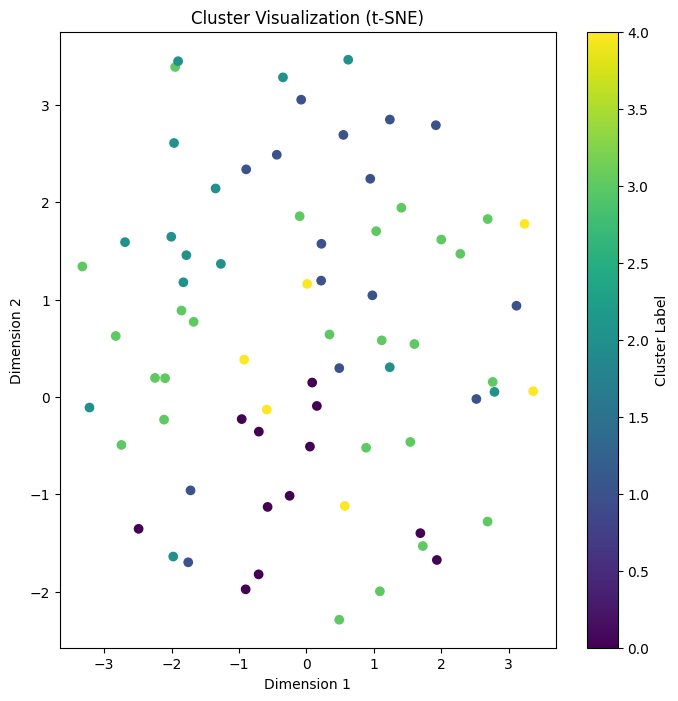

In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE on the text vectors
tsne = TSNE(n_components=2, random_state=42)
text_embeddings_2d = tsne.fit_transform(text_vectors)

# Create a scatter plot of the text embeddings
plt.figure(figsize=(8, 8))
plt.scatter(text_embeddings_2d[:, 0], text_embeddings_2d[:, 1], c=new_df_combined['cluster_label'], cmap='viridis')
plt.title('Cluster Visualization (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


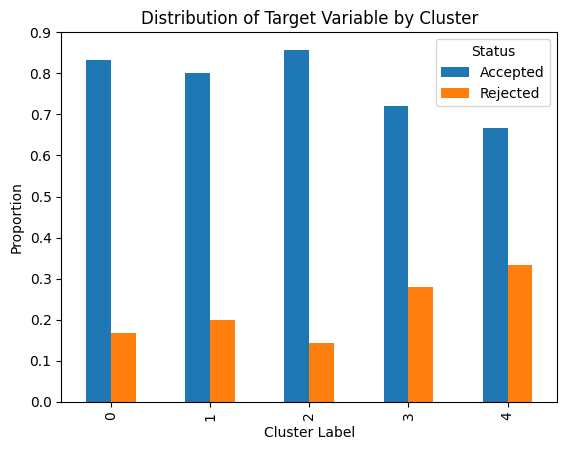

In [13]:
# Group the data by cluster_label and status
cluster_status_counts = new_df_combined.groupby(['cluster_label', 'status']).size().unstack()

# Calculate the distribution of the target variable within each cluster
cluster_status_distribution = cluster_status_counts.div(cluster_status_counts.sum(axis=1), axis=0)

# Plot the distribution of the target variable within each cluster
cluster_status_distribution.plot(kind='bar')
plt.title('Distribution of Target Variable by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Proportion')
plt.legend(title='Status')
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [15]:
# Separate features (X) and target variable (y)
X = new_df_combined[['recommendations', 'gpa', 'gre_quantitative', 'gre_verbal', 'gre_writing', 'total_experience', 'cluster_label']]
y = new_df_combined['status']

In [16]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to fill in missing values
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


In [18]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed_df, y)

# Checking if the SMOTE technique worked
# Before SMOTE
print("Before SMOTE:")
print(y.value_counts())

# After SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
Accepted    56
Rejected    16
Name: status, dtype: int64

After SMOTE:
Accepted    56
Rejected    56
Name: status, dtype: int64


In [19]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Apply the imputer to fill in missing values for test data
X_test_imputed = imputer.transform(X_test)

# Make predictions on the imputed test set
y_pred = rf_classifier.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Accepted')
recall = recall_score(y_test, y_pred, pos_label='Accepted')
f1 = f1_score(y_test, y_pred, pos_label='Accepted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [21]:
from sklearn.model_selection import cross_val_score

# Create an instance of the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.73913043 0.82608696 0.81818182 0.81818182 0.81818182]
Mean accuracy: 0.8039525691699605


In [35]:
## Test

import numpy as np

# Prepare the data for prediction
person_data = [3, 2, 2.1, 0, 0, 0, 4]
# recommendations, total_experience, gpa, gre_quantitative, gre_verbal, gre_writing, cluster_label

person_data = np.reshape(person_data, (1, -1))

# Train the classifier on the resampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Make the prediction
prediction = rf_classifier.predict(person_data)

# Print the predicted status
print("Predicted Status:", prediction)

Predicted Status: ['Accepted']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
